In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
print("row = ",df.shape[0])
print("column = ", df.shape[1])

row =  10000
column =  14


In [56]:
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [57]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [72]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [58]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [59]:
geography = pd.get_dummies(df['Geography'],drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [60]:
gender = pd.get_dummies(df['Gender'],drop_first=True)
gender.head(10)

,Male
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,1


In [61]:
X = pd.concat([x,geography,gender],axis =1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [62]:
X = X.drop(['Geography','Gender'],axis=1)

In [63]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [71]:
y_train.head()

7389    0
9275    0
2995    0
5316    0
356     0
Name: Exited, dtype: int64

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =sc.fit_transform(x_test)

In [81]:
x_train.shape[1]

11

In [77]:
import keras

In [78]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LeakyReLU,PReLU,ELU

In [85]:
model = Sequential()
model.add(Dense(units =6, kernel_initializer = 'he_uniform', activation='relu',input_dim = 11))
model.add(Dense(units =6, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(units =1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [87]:
model_history = model.fit(x_train,y_train, validation_split=0.3, batch_size = 10, nb_epoch =100)

C:\Users\Mega Providers\anaconda3\envs\dp\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5600 samples, validate on 2400 samples
Epoch 1/100
5600/5600 [==============================] - 2s 342us/step - loss: 0.5187 - accuracy: 0.7711 - val_loss: 0.4849 - val_accuracy: 0.7950
Epoch 2/100
5600/5600 [==============================] - 2s 271us/step - loss: 0.4526 - accuracy: 0.7977 - val_loss: 0.4576 - val_accuracy: 0.8000
Epoch 3/100
5600/5600 [==============================] - 1s 236us/step - loss: 0.4334 - accuracy: 0.8050 - val_loss: 0.4454 - val_accuracy: 0.8037
Epoch 4/100
5600/5600 [==============================] - 1s 236us/step - loss: 0.4209 - accuracy: 0.8114 - val_loss: 0.4360 - val_accuracy: 0.8075
Epoch 5/100
5600/5600 [==============================] - 1s 232us/step - loss: 0.4123 - accuracy: 0.8159 - val_loss: 0.4294 - val_accuracy: 0.8100
Epoch 6/100
5600/5600 [==============================] - 1s 251us/step - loss: 0.4056 - accuracy: 0.8218 - val_loss: 0.4253 - val_accuracy: 0.8096
Epoch 7/100
5600/5600 [==============================] - 1s 235us/step

5600/5600 [==============================] - 1s 252us/step - loss: 0.3245 - accuracy: 0.8661 - val_loss: 0.3601 - val_accuracy: 0.8567
Epoch 57/100
5600/5600 [==============================] - 1s 267us/step - loss: 0.3245 - accuracy: 0.8655 - val_loss: 0.3591 - val_accuracy: 0.8587
Epoch 58/100
5600/5600 [==============================] - 1s 260us/step - loss: 0.3239 - accuracy: 0.8673 - val_loss: 0.3604 - val_accuracy: 0.8558
Epoch 59/100
5600/5600 [==============================] - 1s 255us/step - loss: 0.3240 - accuracy: 0.8655 - val_loss: 0.3608 - val_accuracy: 0.8567
Epoch 60/100
5600/5600 [==============================] - 2s 313us/step - loss: 0.3243 - accuracy: 0.8668 - val_loss: 0.3593 - val_accuracy: 0.8562
Epoch 61/100
5600/5600 [==============================] - 1s 245us/step - loss: 0.3241 - accuracy: 0.8657 - val_loss: 0.3599 - val_accuracy: 0.8550
Epoch 62/100
5600/5600 [==============================] - 1s 250us/step - loss: 0.3244 - accuracy: 0.8646 - val_loss: 0.3597 

In [88]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


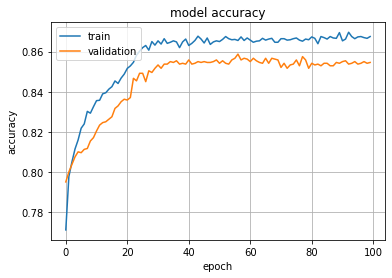

In [95]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.grid()
plt.show()

In [97]:
y_pred = model.predict(x_test)
print(y_pred)

[[0.2785618 ]
 [0.24943581]
 [0.09592558]
 ...
 [0.1765558 ]
 [0.13560723]
 [0.22918001]]


In [98]:
y_pred = (y_pred >0.5)

In [99]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


<AxesSubplot:>

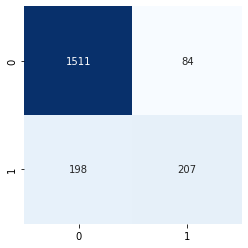

In [111]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [114]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.91464891, 0.59482759])